In [1]:
from brian2 import *
%matplotlib inline

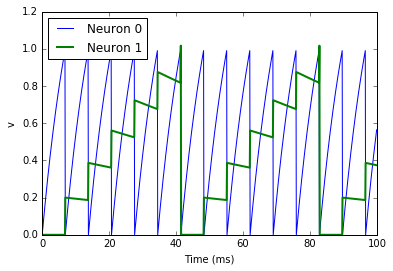

In [2]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(2, eqs, threshold='v>1', reset='v = 0')
G.I = [2, 0]
G.tau = [10, 100]*ms

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, pre='v_post += 0.2')
S.connect(0, 1)

M = StateMonitor(G, 'v', record=True)

run(100*ms)

plot(M.t/ms, M.v[0], '-b', label='Neuron 0')
plot(M.t/ms, M.v[1], '-g', lw=2, label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend(loc='best')

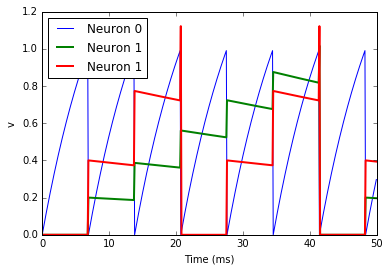

In [3]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0')
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, 'w : 1', pre='v_post += w')
S.connect(0, [1, 2])
S.w = 'j*0.2'

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], '-b', label='Neuron 0')
plot(M.t/ms, M.v[1], '-g', lw=2, label='Neuron 1')
plot(M.t/ms, M.v[2], '-r', lw=2, label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend(loc='best')


<class 'brian2.core.variables.VariableView'> <class 'brian2.core.variables.VariableView'>


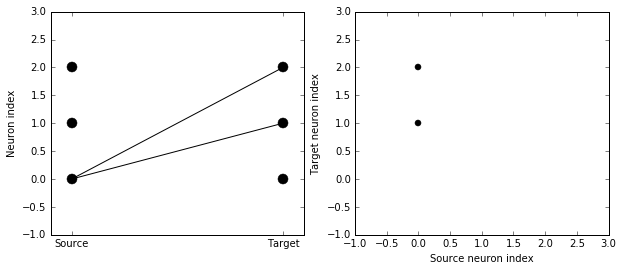

In [4]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    print S.i.__class__, S.j.__class__
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(S)

<class 'brian2.core.variables.VariableView'> <class 'brian2.core.variables.VariableView'>
<class 'brian2.core.variables.VariableView'> <class 'brian2.core.variables.VariableView'>
<class 'brian2.core.variables.VariableView'> <class 'brian2.core.variables.VariableView'>


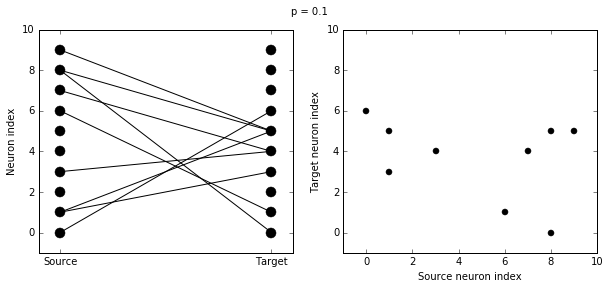

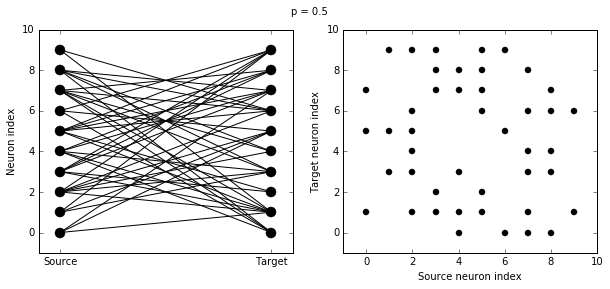

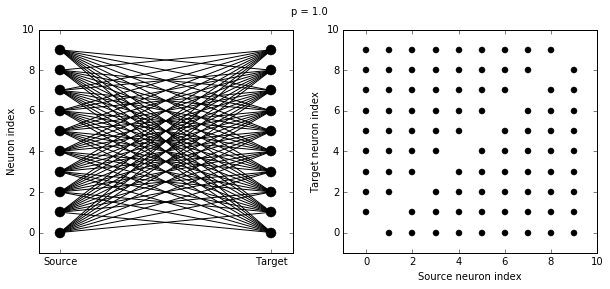

In [5]:
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

for p in [0.1, 0.5, 1.0]:
    S = Synapses(G, G)
    S.connect('i!=j', p=p)
    visualise_connectivity(S)
    suptitle('p = '+str(p))